In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style is consistent
sns.set(style="whitegrid")

In [2]:
# Step 1: Load the dataset
def load_data(file_path):
    try:
        data_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
        data_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')
        combined_data = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True)
        print("Data loaded successfully!")
        return combined_data
    except FileNotFoundError:
        print(f"File {file_path} not found. Please check the path.")
        return None

file_path = 'online_retail_II.xlsx'
combined_data = load_data(file_path)

Data loaded successfully!


In [3]:
# Step 2: Handle missing values
# Drop rows with missing 'Customer ID' or 'Description'
cleaned_data = combined_data.dropna(subset=['Customer ID', 'Description'])

In [4]:
# Step 3: Remove duplicates
cleaned_data = cleaned_data.drop_duplicates()

In [5]:
# Step 4: Feature engineering
# Extract "Day of Week" and "Time of Day" from 'InvoiceDate'
cleaned_data['Day of Week'] = cleaned_data['InvoiceDate'].dt.day_name()
cleaned_data['Time of Day'] = cleaned_data['InvoiceDate'].dt.hour

=== Geographical Trends ===


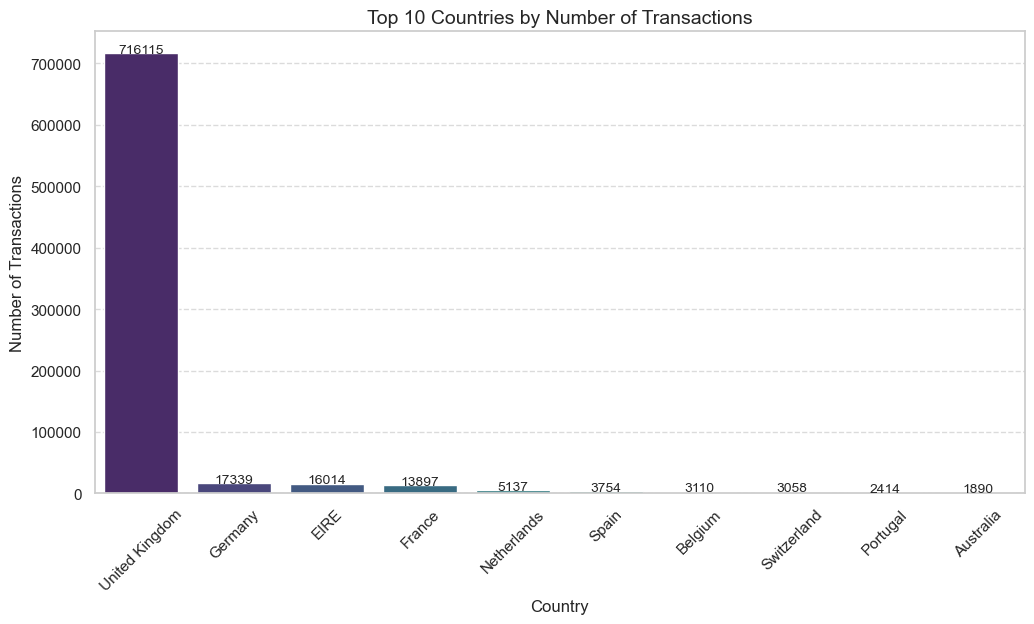

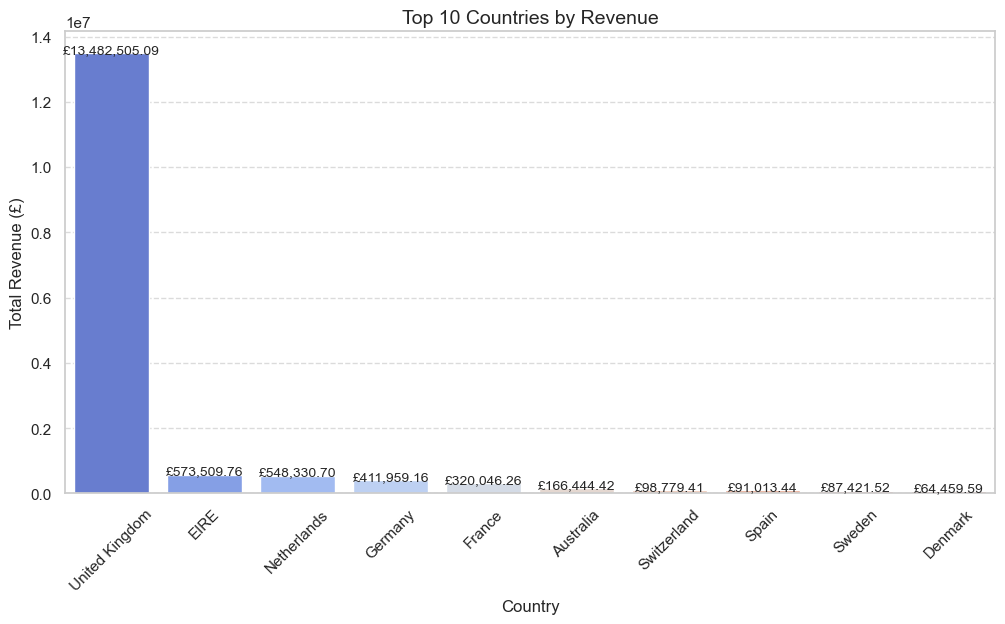

=== Customer Trends ===


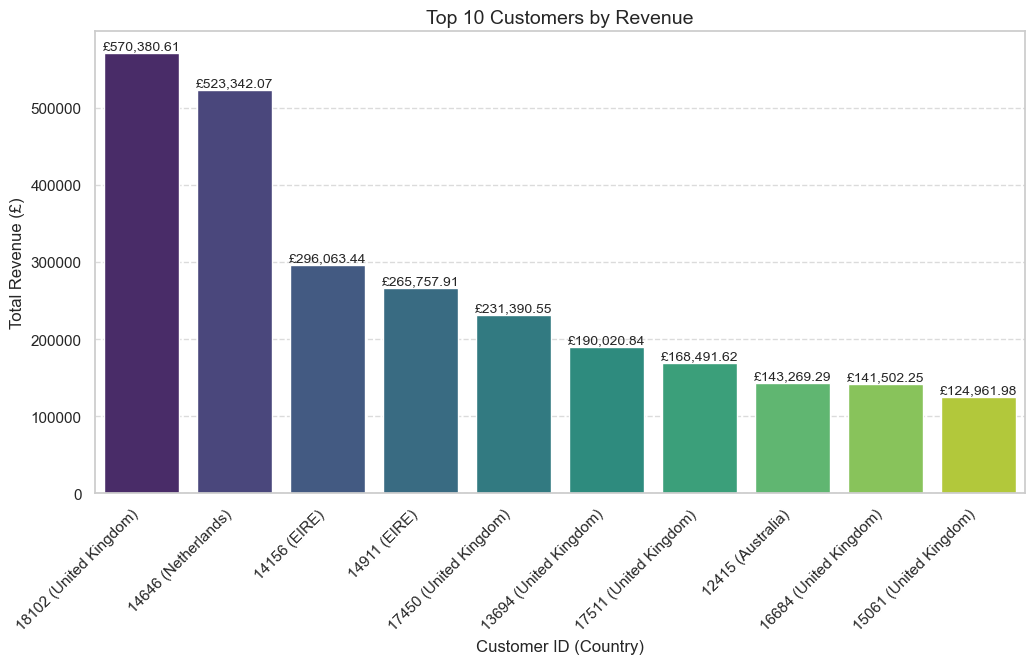

=== Transaction Trends ===


C:\Users\John\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


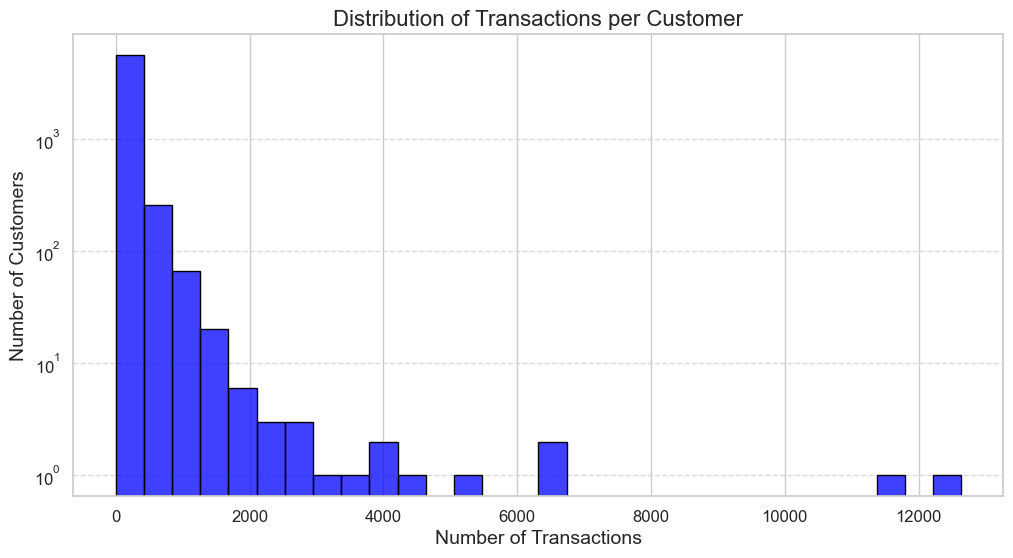

C:\Users\John\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


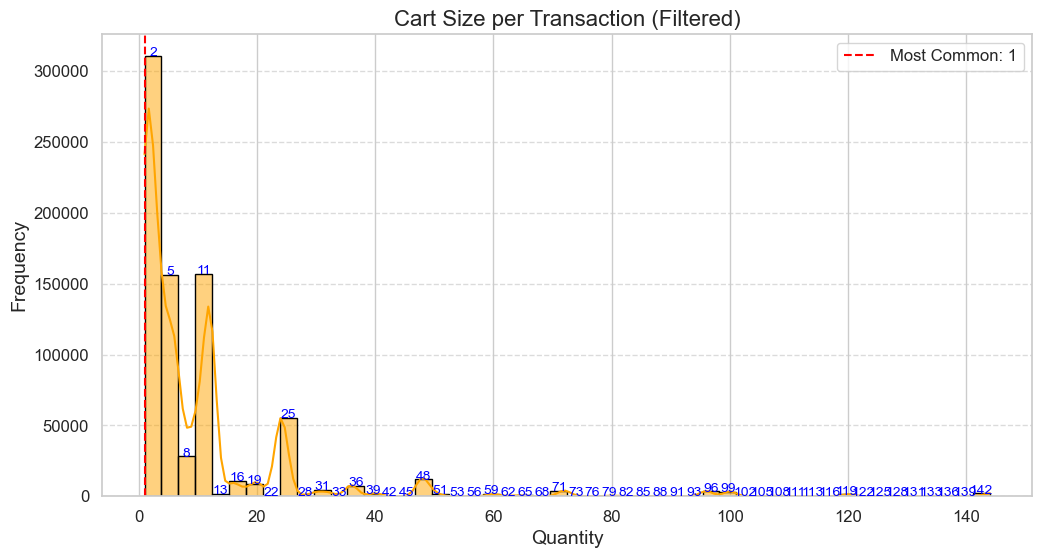

=== Product Trends ===


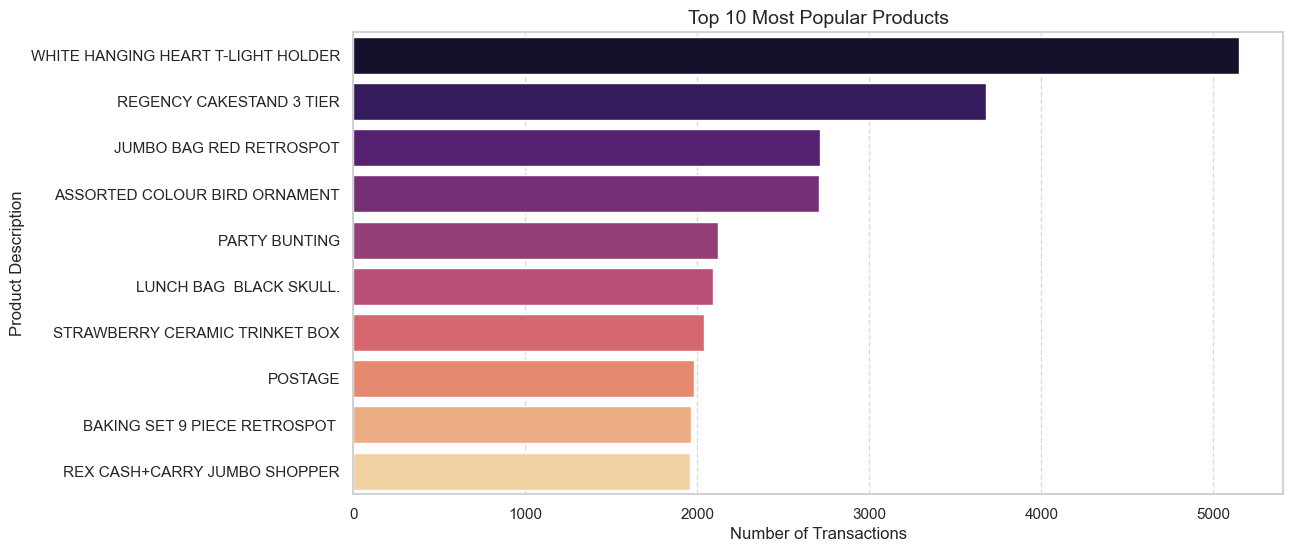

=== Correlations ===


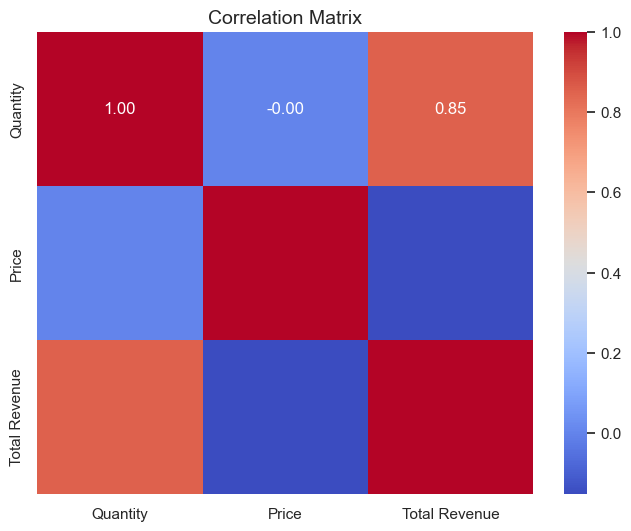

In [8]:
# Step 5: Data Visualization

print('=== Geographical Trends ===')

# 1. Distribution of Customers by Country
# Visualize the top 10 countries with the most transactions
plt.figure(figsize=(12, 6))
country_counts = cleaned_data['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
for i, val in enumerate(country_counts.values):
    plt.text(i, val + 50, str(val), ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Total Revenue by Country
# Calculate Total Revenue (if not already added)
if 'Total Revenue' not in cleaned_data.columns:
    cleaned_data['Total Revenue'] = cleaned_data['Quantity'] * cleaned_data['Price']

# Ensure no missing or invalid data
cleaned_data = cleaned_data.dropna(subset=['Total Revenue'])

# Visualize the top 10 countries generating the most revenue
plt.figure(figsize=(12, 6))
country_revenue = cleaned_data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='coolwarm')
plt.title('Top 10 Countries by Revenue', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue (£)', fontsize=12)
for i, val in enumerate(country_revenue.values):
    plt.text(i, val + 5000, f'£{val:,.2f}', ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

print('=== Customer Trends ===')

# 6. Top Customers by Revenue
# Calculate Total Revenue
cleaned_data['Total Revenue'] = cleaned_data['Quantity'] * cleaned_data['Price']

# Ensure there are no inf or NaN values in 'Total Revenue' and 'Quantity'
cleaned_data['Total Revenue'] = cleaned_data['Total Revenue'].replace([np.inf, -np.inf], np.nan).dropna()
cleaned_data['Quantity'] = cleaned_data['Quantity'].replace([np.inf, -np.inf], np.nan).dropna()

# Aggregate Revenue by Customer
customer_revenue = cleaned_data.groupby(['Customer ID', 'Country'])['Total Revenue'].sum().sort_values(ascending=False)

# Extract the Top 10 Customers
top_customers = customer_revenue.reset_index().head(10)  # Reset index to get columns for ID and Country

# Prepare x-axis labels with ID and Country
top_customers['Customer Label'] = top_customers['Customer ID'].astype(int).astype(str) + " (" + top_customers['Country'] + ")"

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers['Customer Label'], y=top_customers['Total Revenue'], palette='viridis')

# Add Title and Axis Labels
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Customer ID (Country)', fontsize=12)
plt.ylabel('Total Revenue (£)', fontsize=12)

# Add Labels Above the Bars
for i, revenue in enumerate(top_customers['Total Revenue']):
    plt.text(i, revenue + 5000, f'£{revenue:,.2f}', ha='center', fontsize=10)

# Display Grid and Show Plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

print('=== Transaction Trends ===')

# 7. Distribution of Transactions per Customer
# Visualize the number of transactions made by each customer
customer_transactions = cleaned_data['Customer ID'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(customer_transactions, bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Transactions per Customer', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')  # Use log scale for better visibility of variations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 8. Cart Size per Transaction
# Define 'quantity_data' from the cleaned data
quantity_data = cleaned_data['Quantity']

# Ensure 'Quantity' has no inf or NaN values
# Filter out negative or zero quantities
filtered_quantity_data = quantity_data[quantity_data > 0]

# Set a threshold for extreme outliers (e.g., 99th percentile)
outlier_threshold = filtered_quantity_data.quantile(0.99)
filtered_quantity_data = filtered_quantity_data[filtered_quantity_data <= outlier_threshold]

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.histplot(filtered_quantity_data, bins=50, kde=True, color='orange', edgecolor='black')
plt.title('Cart Size per Transaction (Filtered)', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bin quantities (midpoints of bins) on top of the bars
for patch in ax.patches:
    bin_midpoint = patch.get_x() + patch.get_width() / 2  # Calculate the midpoint of the bin
    if patch.get_height() > 0:  # Only annotate bars with non-zero height
        plt.text(bin_midpoint, patch.get_height() + 5, f"{int(bin_midpoint)}", ha='center', fontsize=10, color='blue')

# Annotate the most common quantity
most_common_quantity = filtered_quantity_data.mode()[0]
plt.axvline(x=most_common_quantity, color='red', linestyle='--', label=f'Most Common: {most_common_quantity}')
plt.legend(fontsize=12)

plt.show()

print('=== Product Trends ===')

# 9. Top 10 Most Popular Products
# Visualize the most frequently purchased products
product_counts = cleaned_data['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='magma')
plt.title('Top 10 Most Popular Products', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print('=== Correlations ===')

# 10. Correlation Heatmap
# Analyze the correlation between quantity, price, and total revenue
correlation_matrix = cleaned_data[['Quantity', 'Price', 'Total Revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [9]:
# Step 6: Summary statistics for additional insights
print("Summary Statistics:")
print(cleaned_data[['Quantity', 'Price']].describe())
    
# Save the cleaned and enriched dataset
cleaned_data.to_csv('cleaned_online_retail_data.csv', index=False)
print("Cleaned data saved to 'cleaned_online_retail_data.csv'.")

Summary Statistics:
            Quantity          Price
count  797885.000000  797885.000000
mean       12.602980       3.702732
std       191.670371      71.392549
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000
Cleaned data saved to 'cleaned_online_retail_data.csv'.
